In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report


In [ ]:
train=pd.read_csv("data/train.csv")
print(train.shape)
train.head(5)



(159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
print(train.dtypes)
train.describe()

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test=pd.read_csv("data/test.csv")
print(test.shape)
test.head(10)


(153164, 2)


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [6]:
print(test.dtypes)
test.describe()


id              object
comment_text    object
dtype: object


,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


In [ ]:
test_labels=pd.read_csv("data/test_labels.csv")
print(test_labels.shape)
test_labels.head(10)

(153164, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [8]:
print(train.isna().sum())
print(train.isnull)
print(train.info())
train.duplicated()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
<bound method DataFrame.isnull of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff

0         False
1         False
2         False
3         False
4         False
          ...  
159566    False
159567    False
159568    False
159569    False
159570    False
Length: 159571, dtype: bool

In [9]:
num_train=train.select_dtypes(include=['number'])
num_cor=num_train.corr()
num_cor



,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


In [10]:
cat_train=train.select_dtypes(include=['object'])
train.groupby('comment_text')[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].mean()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
comment_text,,,,,,
!\n\nI won't stop! LOCK IT UP A$$HOLE,1.0,0.0,0.0,0.0,0.0,0.0
"!\n\nIt is now inside your bones, your head. Haunt you forever",1.0,0.0,0.0,0.0,0.0,0.0
"!\n\nSuck my DIHCK! Nihgga!\n\nYou don't want people to know the TRUTH about utorrant, you FAG",1.0,1.0,1.0,0.0,1.0,0.0
!\n\nWHY DOESN'T ANYONE BAN ME \n\nBAN ME BAN ME BAN ME BANNNNNNNNNNNNNNNNNNNNNNNNNN,1.0,0.0,0.0,0.0,0.0,0.0
"!\nPlease stop reverting my edits to Wesley Holiday, if you continue to do so you will be blocked.",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
"➥the Epopt]] 14:00, 8 May",0.0,0.0,0.0,0.0,0.0,0.0
北京 \n\nI am going to reinstate the weatherbox because it appears on two pages (both the city article and the geography article) and a lot of code could be saved by doing so.,0.0,0.0,0.0,0.0,0.0,0.0
"只, is it correctly written in the picture of the calligraphy? I would say it isn't. It is replaced by the wrong word 隻.",0.0,0.0,0.0,0.0,0.0,0.0


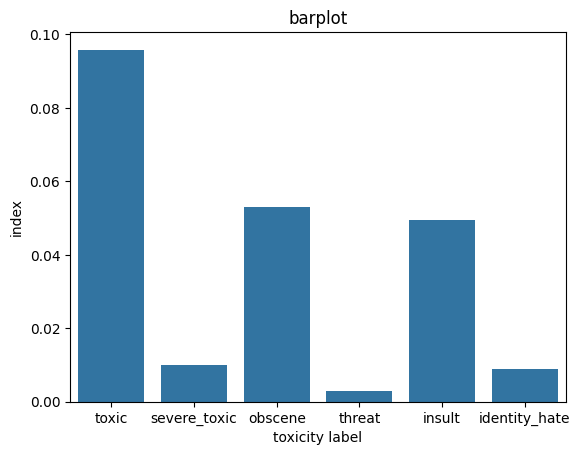

In [11]:
labels=num_train.columns.values
labels_mean=train[labels].mean()
sns.barplot(x=labels_mean.index,y=labels_mean.values)
plt.xlabel("toxicity label")
plt.ylabel("index")
plt.title("barplot")
plt.show()

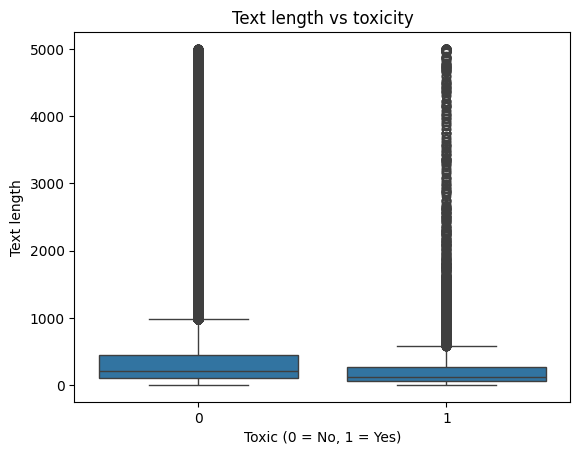

In [12]:
train['text_len']=train.comment_text.str.len()
sns.boxplot(x='toxic',y='text_len',data=train)
plt.xlabel("Toxic (0 = No, 1 = Yes)")
plt.ylabel("Text length")
plt.title("Text length vs toxicity")
plt.show()

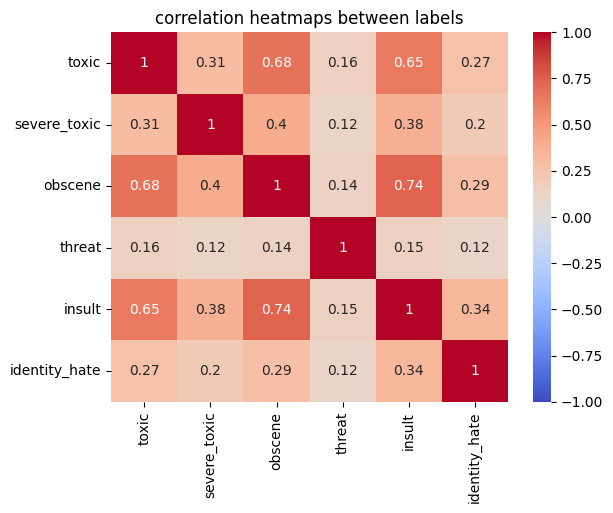

In [13]:
sns.heatmap(
    num_cor,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title("correlation heatmaps between labels")
plt.show()

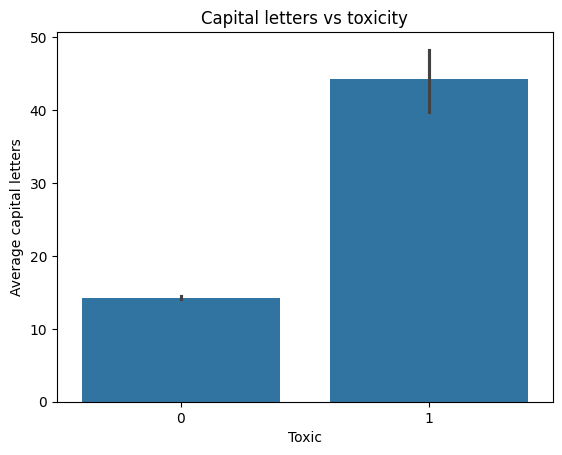

In [14]:
train['caps_count'] = train['comment_text'].str.count(r'[A-Z]')

sns.barplot(
    x='toxic',
    y='caps_count',
    data=train
)

plt.xlabel("Toxic")
plt.ylabel("Average capital letters")
plt.title("Capital letters vs toxicity")
plt.show()


In [15]:
train=train.drop(columns=['id'])

In [16]:
max_chars=1000
train.comment_text=train.comment_text.str.slice(0,max_chars)

In [17]:
train.text_len=np.log1p(train.text_len)
train.caps_count=np.log1p(train.caps_count)
train

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_len,caps_count
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,5.579730,2.890372
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,4.727388,2.197225
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,5.455321,1.609438
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,6.434547,2.484907
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,4.219508,1.098612
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,5.690359,1.098612
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,4.605170,1.098612
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,4.406719,1.609438
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,4.762174,1.098612


In [18]:
X=train['comment_text']
y=train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

X_train,X_val,y_train,y_val=train_test_split(
    X,y,test_size=0.2,random_state=42
)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((127656,), (31915,), (127656, 6), (31915, 6))

In [19]:
#classical NLP approach
tfidf=TfidfVectorizer(
    max_features=30000,
    ngram_range=(1,2),
    min_df=5
)
X_train_new=tfidf.fit_transform(X_train)
X_val_new=tfidf.transform(X_val)

In [20]:
X_train_num=train.loc[X_train.index,['caps_count','text_len']].values
X_val_num=train.loc[X_val.index,['caps_count','text_len']].values
X_train_final=hstack([X_train_new,X_train_num])
X_val_final=hstack([X_val_new,X_val_num])
X_val_final.shape,X_train_final.shape

((31915, 30002), (127656, 30002))

In [21]:
base_model=LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
model=MultiOutputClassifier(base_model)
model.fit(X_train_final,y_train)

MultiOutputClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                   max_iter=1000))

In [22]:
y_val_pred=model.predict(X_val_final)

for i,label in enumerate(y.columns):
    print(f"\nlabel:{label}")
    print(classification_report(y_val.iloc[:,i],y_val_pred[:,i]))


label:toxic
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     28859
           1       0.64      0.87      0.73      3056

    accuracy                           0.94     31915
   macro avg       0.81      0.91      0.85     31915
weighted avg       0.95      0.94      0.94     31915


label:severe_toxic
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     31594
           1       0.29      0.83      0.43       321

    accuracy                           0.98     31915
   macro avg       0.64      0.90      0.71     31915
weighted avg       0.99      0.98      0.98     31915


label:obscene
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     30200
           1       0.67      0.88      0.76      1715

    accuracy                           0.97     31915
   macro avg       0.83      0.93      0.87     31915
weighted avg       0.98   

In [23]:

test.comment_text=test.comment_text.str.slice(0,max_chars)
test['text_len']=test.comment_text.str.len()
test['caps_count']=test.comment_text.str.count(r'[A-Z]')
test[['text_len','caps_count']]=np.log1p(test[['text_len','caps_count']])
X_test=tfidf.transform(test['comment_text'])
X_test_num=test[['text_len','caps_count']]
X_test_final=hstack([X_test,X_test_num])


In [24]:
y_test_prob=model.predict(X_test_final)

In [25]:
submission = pd.DataFrame({
    'id': test['id']
})

for i, label in enumerate(labels):
    submission[label] = y_test_prob[:, i]
submission.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,1,1,1,1,1,1
1,0000247867823ef7,0,0,0,0,0,0
2,00013b17ad220c46,0,0,0,0,0,0
3,00017563c3f7919a,0,0,0,0,0,0
4,00017695ad8997eb,0,0,0,0,0,0
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,0,0,0,0,0,0
7,000247e83dcc1211,1,0,0,0,1,0
8,00025358d4737918,0,0,0,0,0,0
9,00026d1092fe71cc,0,0,0,0,0,0


In [26]:
#transformer NLP approach
from transformers import AutoTokenizer,AutoModelForSequenceClassification,TrainingArguments,Trainer
import torch



In [ ]:
MODEL_NAME="distilbert-base-uncased"

LABELS = [
    'toxic',
    'severe_toxic',
    'obscene',
    'threat',
    'insult',
    'identity_hate'
]
MAX_TRAIN_SAMPLES=20000
EPOCHS=1
BATCH_SIZE=8
if len(X_train) > MAX_TRAIN_SAMPLES:
    X_train_small = X_train.sample(MAX_TRAIN_SAMPLES, random_state=42)
    y_train_small = y_train.loc[X_train_small.index]
else:
    X_train_small = X_train
    y_train_small = y_train
tokenizer=AutoTokenizer.from_pretrained(MODEL_NAME)
def tokenize(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=128
)


'(MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /distilbert-base-uncased/resolve/main/tokenizer_config.json (Caused by NameResolutionError("HTTPSConnection(host=\'huggingface.co\', port=443): Failed to resolve \'huggingface.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: 3bdbd7d0-f12f-4466-91b8-cfa201eb8f25)')' thrown while requesting HEAD https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json
Retrying in 1s [Retry 1/5].
'(MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /distilbert-base-uncased/resolve/main/tokenizer_config.json (Caused by NameResolutionError("HTTPSConnection(host=\'huggingface.co\', port=443): Failed to resolve \'huggingface.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: 6e36d378-5d84-4cc7-81cd-2d6ecf0c8ca6)')' thrown while requesting HEAD https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_

In [68]:
from datasets import Dataset
train_ds=Dataset.from_dict({
    "text":X_train_small.tolist(),
    "labels":y_train_small.astype(float).values.tolist()
})

val_ds=Dataset.from_dict({
    "text":X_val.tolist(),
    "label":y_val.astype(float).values.tolist()
})


In [69]:
train_ds=train_ds.map(tokenize,batched=True,remove_columns=["text"])
val_ds=val_ds.map(tokenize, batched=True,remove_columns=["text"])
train_ds.set_format("torch")
val_ds.set_format("torch")



Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/31915 [00:00<?, ? examples/s]

In [70]:
t_model=AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=len(labels),
    problem_type="multi_label_classification"

)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [71]:
training_args=TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=EPOCHS,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=200,
    save_strategy="no",
    report_to="none"
)

In [72]:
trainer=Trainer(
    model=t_model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer
)
print(train_ds[0]["labels"])
print(type(train_ds[0]["labels"][0]))



tensor([0., 0., 0., 0., 0., 0.])
<class 'torch.Tensor'>


C:\Users\fadis\AppData\Local\Temp\ipykernel_17904\587173651.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer=Trainer(


In [74]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.050200,0.046329


TrainOutput(global_step=2500, training_loss=0.0643149133682251, metrics={'train_runtime': 3693.4322, 'train_samples_per_second': 5.415, 'train_steps_per_second': 0.677, 'total_flos': 663973962817536.0, 'train_loss': 0.0643149133682251, 'epoch': 1.0})

In [76]:
test_ds = Dataset.from_dict({
    "text": test["comment_text"].tolist()
})
test_ds = test_ds.map(
    tokenize,
    batched=True,
    remove_columns=["text"]
)

test_ds.set_format("torch")

Map:   0%|          | 0/153164 [00:00<?, ? examples/s]

In [79]:
test_preds = trainer.predict(test_ds)
test_probs = torch.sigmoid(
    torch.tensor(test_preds.predictions)
).numpy()
test_pred_labels = (test_probs > 0.5).astype(int)
submission = test[["id"]].copy()

for i, label in enumerate(labels):
    submission[label] = test_pred_labels[:, i]

c:\Users\fadis\venv\lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [ ]:
submission.to_csv("predictions/submission.csv",index=False)
submission

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,1,0,1,0,1,0
1,0000247867823ef7,0,0,0,0,0,0
2,00013b17ad220c46,0,0,0,0,0,0
3,00017563c3f7919a,0,0,0,0,0,0
4,00017695ad8997eb,0,0,0,0,0,0
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,1,0,0,0,0,0
153160,fffd7a9a6eb32c16,0,0,0,0,0,0
153161,fffda9e8d6fafa9e,0,0,0,0,0,0
153162,fffe8f1340a79fc2,0,0,0,0,0,0


## Model Comparison and Analysis
This section summarizes and compares the performance of classical NLP models and transformer-based models trained on the same dataset.
### Classical NLP
Classical NLP models offer fast training and inference while remaining lightweight and easy to deploy in production environments. They achieve high recall for toxic classes, making them effective at identifying most harmful content. However, these models tend to suffer from low precision on minority labels, resulting in a higher number of false positives. Additionally, their reliance on bag-of-words–style features limits their ability to capture contextual and semantic nuances in language.

### Transformer Models
Transformer-based models provide strong contextual and semantic understanding of text, enabling more precise detection of rare toxic classes. Their performance is generally more stable across different labels, particularly in highly imbalanced datasets. However, these benefits come at the cost of significantly higher computational and memory requirements, along with slower training and inference times compared to classical approaches.

### Conclusion

Both approaches have clear strengths, and hybrid systems combining classical NLP for speed with transformers for verification can provide an effective balance between performance and efficiency.